In [1]:
import numpy as np
%matplotlib inline
from astropy import units
from astropy import constants
from astropy.table import Table
import matplotlib.pyplot as plt

from matplotlib.colors import LogNorm

COLOR = 'k'#'#FFFAF1'
plt.rcParams['font.size'] = 9
plt.rcParams['text.color'] = COLOR
plt.rcParams['axes.labelcolor'] = COLOR
plt.rcParams['xtick.color'] = COLOR
plt.rcParams['ytick.color'] = COLOR

plt.rcParams['xtick.major.width'] = 1.5
plt.rcParams['ytick.major.width'] = 1.5
plt.rcParams['xtick.major.size']  = 5 #12
plt.rcParams['ytick.major.size']  = 5#12

plt.rcParams['xtick.minor.width'] = 1
plt.rcParams['ytick.minor.width'] = 1
plt.rcParams['xtick.minor.size']  = 8
plt.rcParams['ytick.minor.size']  = 8

plt.rcParams['axes.linewidth'] = 1.5

plt.rcParams['text.color'] = COLOR
plt.rcParams['xtick.color'] = COLOR
plt.rcParams['ytick.color'] = COLOR
plt.rcParams['axes.labelcolor'] = COLOR
#plt.rcParams['axes.spines.top'] = False
#plt.rcParams['axes.spines.right'] = False
plt.rcParams['axes.labelcolor'] = COLOR
plt.rcParams['axes.edgecolor'] = COLOR
plt.rcParams['figure.facecolor'] = 'none'
plt.rcParams['legend.facecolor'] = 'none'
from matplotlib.gridspec import GridSpec



from matplotlib.colors import ListedColormap, LinearSegmentedColormap
from mpl_toolkits.axes_grid1 import make_axes_locatable

custom_colors = ['#153243', '#284b63',
                 '#4d7ea8', #'#90a9c7',
                 #'#a1b4cf',
                 '#b6c2d9',
                '#ffffff', '#f5f5f5', #'#DFE2DF', '#E5D7B6',
                  '#EBCC8C', '#F7B538',
                 '#DB7C26', '#D8572A','#780116']#, '#242325']

pmap = LinearSegmentedColormap.from_list('', custom_colors)
pmap.reversed();

In [2]:
file1 = open('2012ur158_grav.dat', 'r')
Lines = file1.readlines()
  
count = 0
# Strips the newline character
ra_ar_grav=[]
dec_ar_grav=[]
ra_res_grav=[]
dec_res_grav=[]
timer_grav=[]
for line in Lines:
    count += 1
  
    if count>1:
        timer_grav.append(float(line.split()[3]))
        ra_ar_grav.append(float(line.split()[4]))
        dec_ar_grav.append(float(line.split()[5]))
        ra_res_grav.append(float(line.split()[6]))
        dec_res_grav.append(float(line.split()[7]))
        #print(float(line.split()[7]))

In [3]:
file1 = open('2012ur158_ng.dat', 'r')
Lines = file1.readlines()
  
count = 0
# Strips the newline character
ra_ar=[]
dec_ar=[]
ra_res=[]
dec_res=[]
timer=[]
for line in Lines:
    count += 1

    if count>1:
        timer.append(float(line.split()[3]))
        ra_ar.append(float(line.split()[4]))
        dec_ar.append(float(line.split()[5]))
        ra_res.append(float(line.split()[6]))
        dec_res.append(float(line.split()[7]))

In [4]:
arr1inds = np.array(timer).argsort()
timersort=  np.array(timer)[arr1inds[::]]
ra_res_sort= np.array(ra_res)[arr1inds[::]]
dec_res_sort= np.array(dec_res)[arr1inds[::]]

ra_res_grav_sort= np.array(ra_res_grav)[arr1inds[::]]
dec_res_grav_sort= np.array(dec_res_grav)[arr1inds[::]]

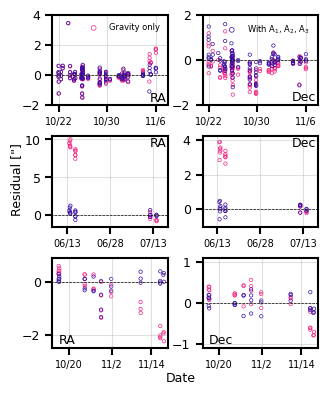

In [5]:
cm = 1/2.54  # centimeters in inches
fig, axs = plt.subplots(3, 2, tight_layout=False,figsize=(8.7*cm,11*cm),sharex=False,sharey=False
                       ,gridspec_kw={'hspace': 0.35, 'wspace': 0.3})
for i in np.arange(3):
    for j in np.arange(2):
        axs[i,j].grid(alpha=0.4)
        axs[i,j].plot([-10,1e6],[0,0],color='k',linestyle='--',lw=0.5)
splot=6
linewidth=.5
#first row
axs[0,0].scatter(timersort-timersort[0],ra_res_grav_sort,marker='o',
            edgecolor='#f72585',lw=linewidth,s=splot,color='none',label='Gravity only',
                    alpha=1.0)
axs[0,0].scatter(timersort-timersort[0],ra_res_sort,marker='o',
            edgecolor='#3a0ca3',lw=linewidth,s=splot,color='none',#label=r'With A$_1$, A$_2$, A$_3$',
                    alpha=1.0)
axs[0,1].scatter(timersort-timersort[0],dec_res_grav_sort,marker='o',
            edgecolor='#f72585',lw=linewidth,s=splot,color='none')
axs[0,1].scatter(timersort-timersort[0],dec_res_sort,marker='o',
            edgecolor='#3a0ca3',lw=linewidth,s=splot,color='none',label=r'With A$_1$, A$_2$, A$_3$')
axs[0,0].set_xlim(-1,18)
axs[0,1].set_xlim(-1,18)
axs[0,0].set_ylim(-2,4)
axs[0,1].set_ylim(-2,2)
axs[0,0].set_xticks((0,8,16))#,angle = 45)
axs[0,0].set_xticklabels(['10/22','10/30','11/6',],rotation=0,fontsize=7)
axs[0,1].set_xticks((0,8,16))#,angle = 45)
axs[0,1].set_xticklabels(['10/22','10/30','11/6',],rotation=0,fontsize=7)
axs[0,0].annotate('RA',xy=(15,-1.8))
axs[0,1].annotate('Dec',xy=(13.7,-1.8))
axs[0,0].legend(fancybox=True, framealpha=1, shadow=False, borderpad=0.5,#bbox_to_anchor=(0.5,1.3755),
            frameon=False, loc='upper right', ncol=1,prop={'size': 6}
                ,facecolor='none',markerscale=1.4)

axs[0,1].legend(fancybox=True, framealpha=1, shadow=False, borderpad=0.5,#bbox_to_anchor=(0.5,1.3755),
            frameon=False, loc='upper right', ncol=1,prop={'size': 6}
                ,facecolor='none',markerscale=1.4)


#second row
axs[1,0].scatter(timersort-timersort[0],ra_res_grav_sort,marker='o',
            edgecolor='#f72585',lw=linewidth,s=splot,color='none',label='Gravity only',
                    alpha=1.0)
axs[1,0].scatter(timersort-timersort[0],ra_res_sort,marker='o',
            edgecolor='#3a0ca3',lw=linewidth,s=splot,color='none',#label=r'With A$_1$, A$_2$, A$_3$',
                    alpha=1.0)
axs[1,1].scatter(timersort-timersort[0],dec_res_grav_sort,marker='o',
            edgecolor='#f72585',lw=linewidth,s=splot,color='none')
axs[1,1].scatter(timersort-timersort[0],dec_res_sort,marker='o',
            edgecolor='#3a0ca3',lw=linewidth,s=splot,color='none',label=r'With A$_1$, A$_2$, A$_3$')

axs[1,0].set_xlim(1325,1365)
axs[1,1].set_xlim(1325,1365)

axs[1,0].set_ylim(-1.5,10.4)
axs[1,1].set_ylim(-1.,4.2)

axs[1,1].set_xticks((1330,1345,1360))#,angle = 45)
axs[1,0].set_xticks((1330,1345,1360))#,angle = 45)
axs[1,0].set_xticklabels(['06/13','06/28','07/13',],rotation=0,fontsize=7)
axs[1,1].set_xticklabels(['06/13','06/28','07/13',],rotation=0,fontsize=7)
axs[1,0].annotate('RA',xy=(1358.8,9))
axs[1,1].annotate('Dec',xy=(1356,3.6))

#third row
axs[2,0].scatter(timersort-timersort[0],ra_res_grav_sort,marker='o',
            edgecolor='#f72585',lw=linewidth,s=splot,color='none',label='Gravity only',
                    alpha=1.0)
axs[2,0].scatter(timersort-timersort[0],ra_res_sort,marker='o',
            edgecolor='#3a0ca3',lw=linewidth,s=splot,color='none',#label=r'With A$_1$, A$_2$, A$_3$',
                    alpha=1.0)
axs[2,1].scatter(timersort-timersort[0],dec_res_grav_sort,marker='o',
            edgecolor='#f72585',lw=linewidth,s=splot,color='none')
axs[2,1].scatter(timersort-timersort[0],dec_res_sort,marker='o',
            edgecolor='#3a0ca3',lw=linewidth,s=splot,color='none',label=r'With A$_1$, A$_2$, A$_3$')

axs[2,0].set_xlim(3640,3685)
axs[2,1].set_xlim(3640,3685)
axs[2,0].set_ylim(-2.5,0.9)
axs[2,1].set_ylim(-1.1,1.1)
axs[2,0].set_xlim(3645,3680)
axs[2,1].set_xlim(3645,3680)

axs[2,0].set_xticks((3650,3663,3675))#,angle = 45)
axs[2,0].set_xticklabels(['10/20','11/2','11/14',],rotation=0,fontsize=7)
axs[2,1].set_xticks((3650,3663,3675))#,angle = 45)
axs[2,1].set_xticklabels(['10/20','11/2','11/14',],rotation=0,fontsize=7)
axs[2,0].annotate('RA',xy=(3647,-2.35))
axs[2,1].annotate('Dec',xy=(3647,-1.))
fig.text(0.5, 0.04, 'Date', ha='center', va='center')
fig.text(0.02, 0.5, r'Residual ["]', ha='center', va='center', rotation='vertical')

plt.savefig('2012UR158_astrometric_residuals_vector.pdf',
            format='pdf',bbox_inches='tight', dpi=600)


